In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("StudentsPerformance_modified.csv")

In [3]:
df.shape

(1000, 8)

In [4]:
df.size


8000

In [5]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [9]:
df['math score'] = df["math score"].apply(pd.to_numeric, errors='coerce')

In [10]:
df['math score'].fillna(df['math score'].mean(), inplace=True)
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [13]:
score = ['math score', 'reading score', 'writing score']

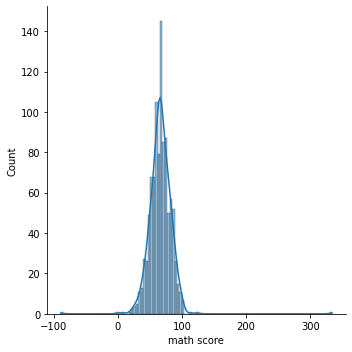

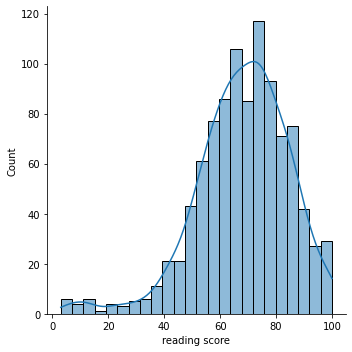

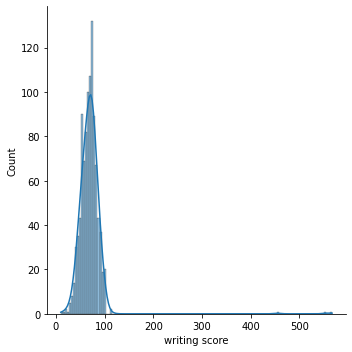

In [14]:
for item in score:
    sns.displot(df[item], kde=True)

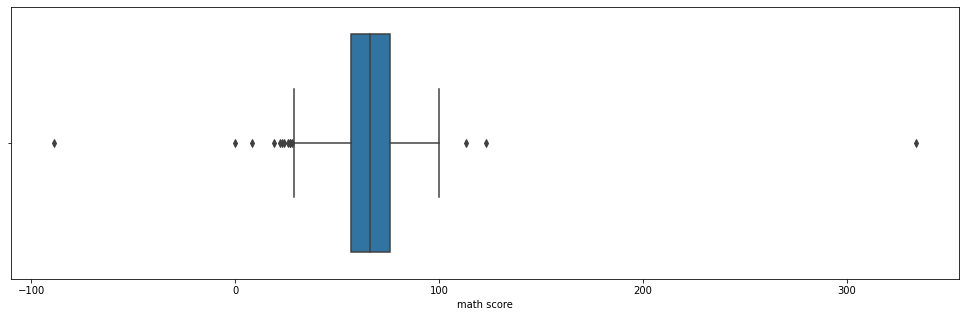

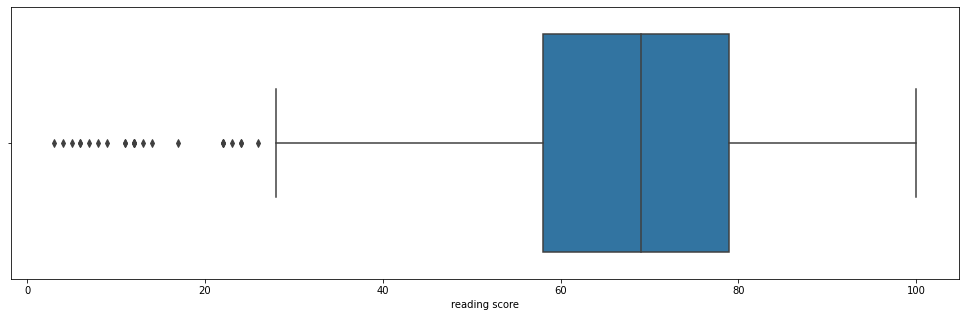

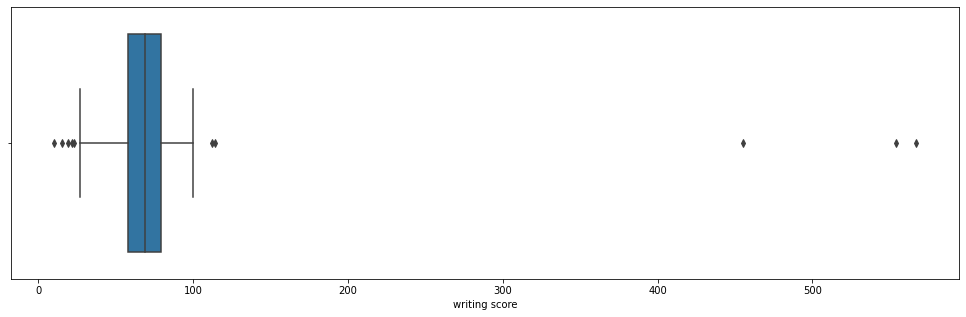

In [15]:
for item in score:
    plt.figure(figsize=(17,5))
    sns.boxplot(data= df, x = item)

In [16]:
for item in score:
  
    Q1 = np.percentile(df[score], 25, interpolation ='midpoint')
    Q3 = np.percentile(df[score], 75, interpolation ='midpoint')
    iqr = Q3 - Q1
    upper = np.where(df[score] >= Q3+1.5*iqr)
    lower = np.where(df[score] <= Q1-1.5*iqr)
    df.drop(upper[0], inplace=True)
    df.drop(lower[0], inplace=True)

<AxesSubplot:>

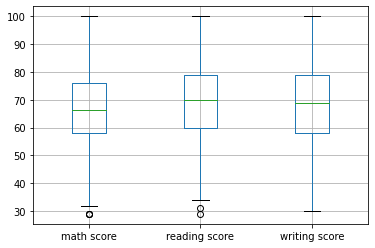

In [17]:
df.boxplot(score)

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
df[['math score','reading score','writing score']]=min_max_scaler.fit_transform(df[['math score','reading score','writing score']])

In [19]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.605634,0.605634,0.628571
1,female,group C,some college,standard,completed,0.563380,0.859155,0.828571
2,female,group B,master's degree,standard,none,0.859155,0.929577,0.900000
3,male,group A,associate's degree,free/reduced,none,0.253521,0.394366,0.200000
4,male,group C,some college,standard,none,0.661972,0.690141,0.642857
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.830986,0.985915,0.928571
996,male,group C,high school,free/reduced,none,0.464789,0.366197,0.357143
997,female,group C,high school,free/reduced,completed,0.422535,0.591549,0.500000
998,female,group D,some college,standard,completed,0.549296,0.690141,0.671429


In [37]:
df.shape

(997, 8)

In [20]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [21]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [22]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [25]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [27]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [20]:
encoder = LabelEncoder()

In [21]:
df.gender = encoder.fit_transform(df['gender'])

In [23]:
df['test preparation course'] = encoder.fit_transform(df['test preparation course'])

In [26]:
df.lunch = encoder.fit_transform(df.lunch)

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,1,0.605634,0.605634,0.628571
1,0,group C,some college,1,0,0.563380,0.859155,0.828571
2,0,group B,master's degree,1,1,0.859155,0.929577,0.900000
3,1,group A,associate's degree,0,1,0.253521,0.394366,0.200000
4,1,group C,some college,1,1,0.661972,0.690141,0.642857


In [28]:
df['race/ethnicity'] = encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = encoder.fit_transform(df['parental level of education'])


In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0.605634,0.605634,0.628571
1,0,2,4,1,0,0.563380,0.859155,0.828571
2,0,1,3,1,1,0.859155,0.929577,0.900000
3,1,0,0,0,1,0.253521,0.394366,0.200000
4,1,2,4,1,1,0.661972,0.690141,0.642857


In [30]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64